In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [23]:
# call on image pre-processing

def img_seg_rgb(path, verbose=False):
  
  def preprocess_helper(raw_img):
    # apply median blur to reduce image noise
    img = cv2.medianBlur(raw_img, 3)
    
    #img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
    #img = cv2.equalizeHist(raw_img)
    
    return img
  
  # load image
  raw_img = cv2.imread(path)
  
  # preprocess image with histogram equalization
  pre_img = preprocess_helper(raw_img)
  
  # get green image channel as the one with the most contrast
  green_img = pre_img[:,:,1]
  red_img = pre_img[:,:,2]
  blue_img = pre_img[:,:,0]
  
  # convert green_img to float
  green_img_float = green_img.astype(np.float32)/255.0
  red_img_float = red_img.astype(np.float32)/255.0
  blue_img_float = red_img.astype(np.float32)/255.0
  
  
  # remember the shape of the channel/image
  channel_shape = green_img_float.shape
  
  # vectorize green channel
  vec_green = green_img_float.reshape((-1,1))
  
  # vectorize red channel
  vec_red = red_img_float.reshape((-1,1))
  
  # vectorize blue channel
  vec_blue = blue_img_float.reshape((-1,1))
  
  # start with 3 clusters:
  # 1. background
  # 2. non-target cells
  # 3. target cells
  km_g = KMeans(n_clusters=4, random_state=0, init="k-means++", n_init="auto").fit(vec_green)
  labs_g = np.unique(km_g.labels_)
  
  km_r = KMeans(n_clusters=4, random_state=0, init="k-means++", n_init="auto").fit(vec_red)
  labs_r = np.unique(km_r.labels_)
  
  km_b = KMeans(n_clusters=4, random_state=0, init="k-means++", n_init="auto").fit(vec_blue)
  labs_b = np.unique(km_b.labels_)
  
  if verbose:
    fig, axs = plt.subplots(5,3,figsize=(15,15))
    axs[0,0].imshow(raw_img.astype(np.float32)/255.0)
    axs[0,0].axis('off')
    axs[0,1].imshow(raw_img.astype(np.float32)/255.0)
    axs[0,1].axis('off')
    axs[0,2].imshow(raw_img.astype(np.float32)/255.0)
    axs[0,2].axis('off')
    for i in range(1,5):
      temp_img = np.zeros(vec_green.shape)
      temp_img[km_g.labels_ == labs_g[i-1]] = 1
      axs[i,0].imshow(temp_img.reshape(channel_shape), cmap='gray')
      axs[i,0].axis('off')
      
      temp_img = np.zeros(vec_red.shape)
      temp_img[km_r.labels_ == labs_r[i-1]] = 1
      axs[i,1].imshow(temp_img.reshape(channel_shape), cmap='gray')
      axs[i,1].axis('off')
      
      temp_img = np.zeros(vec_blue.shape)
      temp_img[km_b.labels_ == labs_b[i-1]] = 1
      axs[i,2].imshow(temp_img.reshape(channel_shape), cmap='gray')
      axs[i,2].axis('off')

    plt.show()
  
#   # pick the cluster with highest green intensity (darkest)
#   cl = labs[np.argmax([ np.mean(vec[km.labels_ == lab]) for lab in labs ])]
  
#   if verbose: print("Run 1 k-means cluster with max green intensity:", cl)
  
#   # create mask for highest intensity cluster
#   mask = np.ones(vec.shape)
  
#   mask[(km.labels_ == cl)] = 0
#   mask = mask.reshape(channel_shape)
  
#   # perform second segmentation of cells and nucleus
#   sub_green_img = green_img_float[mask == 1].copy()
#   #green_img_part2[mask == 1] = green_img_float[mask == 1]
  
#   # vectorize green channel
#   vec2 = sub_green_img.reshape((-1,1))
  
#   # start with 2 clusters:
#   # 1. cell outer
#   # 3. nucleus
#   km2 = KMeans(n_clusters=2, random_state=0, init="k-means++", n_init="auto").fit(vec2)
#   labs2 = np.unique(km2.labels_)
  
#   # pick the cluster with the highest intensity
#   cl2 = labs2[np.argmax([ np.mean(vec2[km2.labels_ == lab]) for lab in labs2 ])]
  
#   if verbose: print("Run 2 k-means cluster with max green intensity:", cl2)
  
#   # create mask for highest intensity cluster
#   mask2 = np.zeros(vec.shape)
#   mask2[(km.labels_ != cl)] = 1
#   mask2[np.where(km.labels_ != cl)[0][km2.labels_ != cl2]] = 0.5
  
#   mask2 = mask2.reshape(channel_shape)
  
#   # perform second segmentation of cells and nucleus
#   #green_img_part2 = np.ones(channel_shape)
#   #green_img_part2[mask == 1] = green_img_float[mask == 1]

#   if verbose:
#     fig, axs = plt.subplots(4,1,figsize=(5,15))
#     axs[0].imshow(raw_img.astype(np.float32)/255.0)
#     #axs[0].title.set_text("/".join(p.split('/')[-2:]))
#     axs[0].axis('off')
#     axs[1].imshow(green_img_float, cmap='gray')
#     #axs[1].title.set_text("/".join(p.split('/')[-2:]))
#     axs[1].axis('off')
#     axs[2].imshow(mask, cmap='gray')
#     #axs[2].title.set_text("/".join(p.split('/')[-2:]))
#     axs[2].axis('off')
#     axs[3].imshow(mask2, cmap='gray')
#     #axs[3].title.set_text("/".join(p.split('/')[-2:]))
#     axs[3].axis('off')

#     plt.show()
  
  
  
  
  

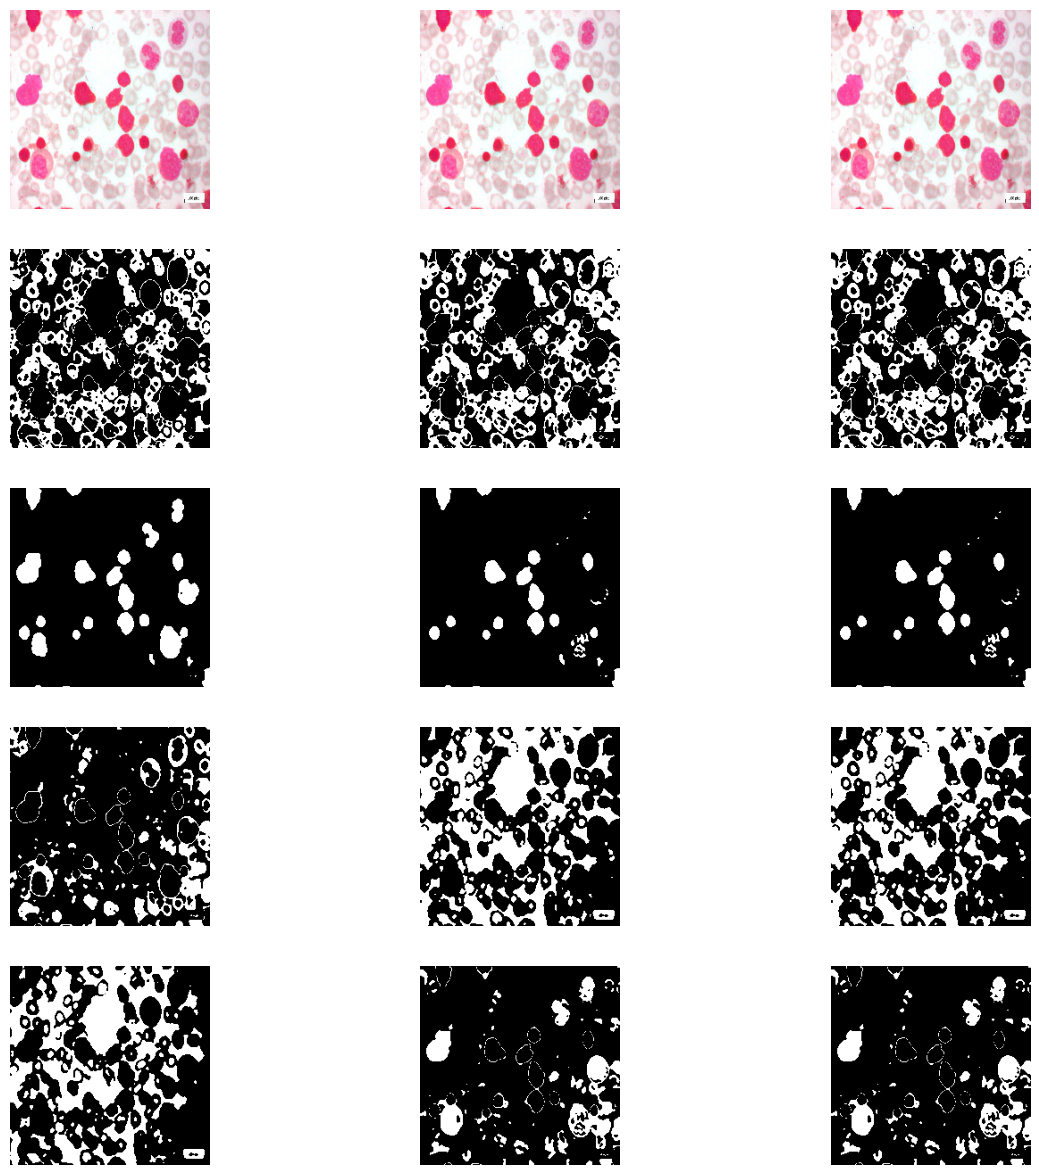

In [24]:
img_seg_rgb('data/train/Benign/001.jpg', verbose=True)

In [14]:
def img_seg_lab(path, verbose=False):
  
  def preprocess_helper(raw_img):
    # apply median blur to reduce image noise
    img = cv2.medianBlur(raw_img, 3)
    
    #img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
    #img = cv2.equalizeHist(raw_img)
    
    return img
  
  # load image
  raw_img = cv2.imread(path)
  img_shape = raw_img.shape
  channel_shape = raw_img.shape[:2]
  
  # preprocess image with histogram equalization
  pre_img = preprocess_helper(raw_img)
  
  # convert to LAB
  lab_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2LAB)
  lc,ac,bc = cv2.split(lab_img)

  # vectorize pixels keeping a,b channels
  vec = np.stack((ac,bc), axis=-1).reshape(-1,2)
  
  # k-medoids
  #km = KMedoids(n_clusters=4, init='k-medoids++', method='pam', max_iter=20).fit(vec)
  km = KMeans(n_clusters=4, random_state=0, init="k-means++", n_init="auto").fit(vec)
  labs = np.unique(km.labels_)
  
  if verbose:
    fig, axs = plt.subplots(5,1,figsize=(15,15))
    axs[0].imshow(raw_img.astype(np.float32)/255.0)
    axs[0].axis('off')
    for i in range(1,5):
      temp_img = raw_img.copy().astype(np.float32)/255.0
      temp_img[(km.labels_ != labs[i-1]).reshape(channel_shape),:] = 0
      axs[i].imshow(temp_img, cmap='gray')
      axs[i].axis('off')

    plt.show()

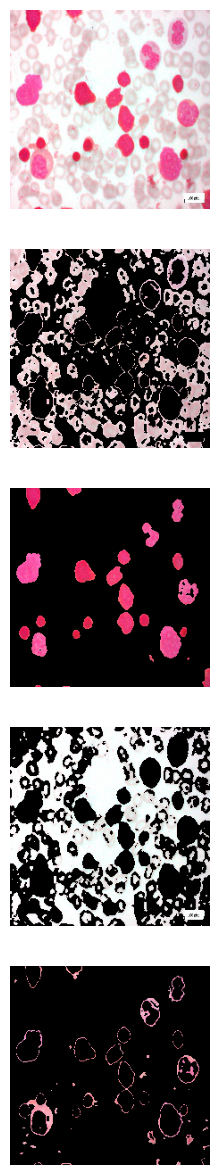

In [22]:
img_seg_lab('data/train/Benign/001.jpg', verbose=True)

In [ ]:
# define base path and Path objects for different image sets
img_path_base = 'data/'
path_train = Path(img_path_base) / 'train/'
path_valid = Path(img_path_base) / 'valid/'
path_test = Path(img_path_base) / 'test/'

train_labels = [ pobj.parts[-1].lower() for pobj in path_train.iterdir() if pobj.is_dir() ]
print("Labels: ", train_labels)

In [ ]:
# image paths for each set
train_set = sorted([ pobj for dobj in train_labels for pobj in (path_train / dobj.title()).iterdir() if (
  pobj.is_file() and str(pobj).endswith('.jpg')) ])

valid_set = sorted([ pobj for dobj in train_labels for pobj in (path_valid / dobj.title()).iterdir() if (
  pobj.is_file() and str(pobj).endswith('.jpg')) ])

test_set = sorted([ pobj for dobj in train_labels for pobj in (path_test / dobj.title()).iterdir() if (
  pobj.is_file() and str(pobj).endswith('.jpg')) ])

In [ ]:
# create temp verification set for preprocessing
ver_set = [ str(pobj) for pobj in train_set if pobj.parts[-1] in ['001.jpg','002.jpg'] ]
ver_set

In [ ]:
# read images, convert to [0, 1] floats
imgs = [ cv2.imread(sobj).astype(np.float32) / 255.0 for sobj in ver_set ]
print("Images value range:",(np.min(imgs[0]), np.max(imgs[0])))

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(10,15))
for i, p in enumerate(ver_set):
  axs[i//2,i%2].imshow(imgs[i])
  axs[i//2,i%2].title.set_text("/".join(p.split('/')[-2:]))
  axs[i//2,i%2].axis('off')
  
plt.show()

In [ ]:
# pre-process images
proc_imgs = [ img_seg(img_path) for img_path in ver_set ]  

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(15,15))
for i, p in enumerate(ver_set):
  axs[i//2,i%2].imshow(proc_imgs[i], cmap='gray')
  axs[i//2,i%2].title.set_text("/".join(p.split('/')[-2:]))
  axs[i//2,i%2].axis('off')
  
plt.show()